In [79]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
pd.options.mode.use_inf_as_na = True

/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3945721426.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


In [31]:
curr_set = 'real1'
data_folder = '/Users/ngocanh/Documents/Master/in progress/CS4220/scripts'
src_file = f'{data_folder}/{curr_set}_final.csv'
with open(src_file) as x:
    ncols = len(x.readline().split('\t'))

df = pd.read_csv(src_file, delimiter='\t', usecols=range(1,ncols))
df['Chr'] = df['Chr'].astype(str)
df

/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/218897251.py:7: DtypeWarning: Columns (1,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(src_file, delimiter='\t', usecols=range(1,ncols))


,Chr,START_POS_REF,END_POS_REF,REF,ALT,REF_MFVdVs,ALT_MFVdVs,Sample_Name,FILTER_Mutect2,FILTER_Freebayes,...,vs_SPV,vs_SSC,vd_AF,vd_DP,vd_MSI,vd_SAMPLE,vd_SOR,vd_SSF,vd_VD,is_snv
0,1,13110,13110,G,A,G/NA/G/G/,A/NA/A/A/,icgc_cll-T,True,False,...,0.522430,2.0,0.1127,213.0,2.0,NaN,1.36189,0.23427,24.0,False
1,1,15015,15015,G,C,G/NA/NA/G/,C/NA/NA/C/,icgc_cll-T,True,False,...,0.302390,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,1,16949,16949,A,C,NA/NA/NA/A/,NA/NA/NA/C/,icgc_cll-T,False,False,...,0.023282,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,1,40552,40552,T,C,NA/NA/NA/T/,NA/NA/NA/C/,icgc_cll-T,False,False,...,0.002231,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,1,46907,46907,T,C,NA/NA/NA/T/,NA/NA/NA/C/,icgc_cll-T,False,False,...,0.017670,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49349,5,109437603,109437603,C,T,C/NA/NA/NA/,T/NA/NA/NA/,icgc_cll-T,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
49350,6,32948607,32948607,C,T,NA/C/NA/NA/,NA/T/NA/NA/,icgc_cll-T,False,False,...,0.157660,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
49351,6,83460027,83460027,G,C,G/NA/NA/NA/,C/NA/NA/NA/,icgc_cll-T,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
49352,8,95172500,95172500,A,G,A/NA/NA/NA/,G/NA/NA/NA/,icgc_cll-T,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [32]:
df['is_snv_int'] = df.apply(lambda row: 1 if row['is_snv'] else 0, axis=1)

In [33]:
df.describe()

/opt/anaconda3/envs/cs4220p1/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/opt/anaconda3/envs/cs4220p1/lib/python3.12/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,START_POS_REF,END_POS_REF,m2_MQ,m2_FS,m2_MQ0,m2_MQRankSum,m2_NLOD,m2_PON,f_MQMR,f_MQM,...,vs_GPV,vs_SPV,vs_SSC,vd_AF,vd_DP,vd_MSI,vd_SOR,vd_SSF,vd_VD,is_snv_int
count,4.935400e+04,4.935400e+04,8748.000000,8748.000000,8748.000000,8746.000000,8748.000000,0.0,7543.000000,7543.000000,...,39674.000000,39674.000000,39674.000000,16082.000000,16082.000000,16082.000000,16082.00000,16082.000000,16082.000000,49354.000000
mean,6.510178e+07,6.510178e+07,54.527889,7.400466,30.870828,-1.514257,14.549635,NaN,49.353965,46.626392,...,0.918865,0.118008,15.222287,0.333358,44.021639,4.168423,inf,0.101941,12.528666,0.026502
std,5.461688e+07,5.461688e+07,7.065909,12.478167,233.292398,2.152829,52.547660,NaN,15.612244,14.947800,...,0.272562,0.169652,17.291357,0.232171,121.875838,5.323843,NaN,0.186042,97.174908,0.160626
min,3.000000e+00,3.000000e+00,10.130000,0.000000,0.000000,-28.182000,0.507000,NaN,0.000000,7.687660,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.152020e+07,2.152020e+07,50.697500,0.000000,0.000000,-2.688750,5.070000,NaN,43.209550,32.524400,...,1.000000,0.018315,8.000000,0.150000,18.000000,1.000000,3.77209,0.000110,4.000000,0.000000
50%,5.136947e+07,5.136947e+07,57.520000,3.001000,0.000000,-0.549000,8.510000,NaN,57.589300,54.190500,...,1.000000,0.051458,12.000000,0.252050,26.000000,2.000000,NaN,0.024035,8.000000,0.000000
75%,9.623364e+07,9.623364e+07,60.000000,9.488500,8.000000,0.000000,12.940000,NaN,60.000000,60.000000,...,1.000000,0.151600,17.000000,0.451600,44.000000,4.000000,NaN,0.117650,13.000000,0.000000
max,2.492405e+08,2.492405e+08,62.650000,269.112000,8213.000000,7.936000,2283.250000,NaN,70.000000,70.000000,...,1.000000,1.000000,255.000000,1.000000,12112.000000,56.000000,inf,1.000000,12052.000000,1.000000


In [34]:
df['Sample_Name'].unique()

array(['icgc_cll-T'], dtype=object)

In [35]:
df['vd_SAMPLE'].unique()

array([nan, 'icgc_cll-T'], dtype=object)

In [36]:
df['m2_PON'].unique()

array([nan])

In [63]:
df['f_PAO'].unique()

array([nan,  0.])

In [66]:
df['f_PQA'].unique()

array([nan,  0.])

In [69]:
df['f_PRO'].unique()

array([nan,  0.])

In [72]:
df['f_PQR'].unique()

array([nan,  0.])

In [80]:
print(df['vd_SOR'].max())
print(df['vd_SOR'].min())

411.409
0.0


In [73]:
# Sample_Name contains only 1 value
# vd_SAMPLE, f_PAO, f_NS, f_PQA contains only 1 value & NaN
# f_MIN_DP have 100% NaN
# m2_PON have 100% NaN
non_feature_cols = ['ALT', 'REF_MFVdVs', 'ALT_MFVdVs', 'Sample_Name', 'vd_SAMPLE', 'f_MIN_DP', 'm2_PON', 'f_NS', 'f_PAO', 'f_PQR', 'f_PRO', 'f_PQA', 'is_snv', 'is_snv_int' ]
all_cols = df.columns
feature_cols = list(set(all_cols) - set(non_feature_cols))
feature_cols

['vd_VD',
 'vs_SPV',
 'vd_SOR',
 'FILTER_Vardict',
 'f_MQMR',
 'vs_GPV',
 'REF',
 'm2_NLOD',
 'm2_FS',
 'f_AF',
 'f_QR',
 'm2_MQRankSum',
 'm2_MQ',
 'START_POS_REF',
 'FILTER_Mutect2',
 'f_ODDS',
 'f_RPL',
 'f_RO',
 'vd_DP',
 'f_GTI',
 'END_POS_REF',
 'f_ABP',
 'Chr',
 'f_RPP',
 'f_AC',
 'vd_MSI',
 'f_QA',
 'FILTER_Freebayes',
 'vs_DP',
 'f_NUMALT',
 'f_MEANALT',
 'f_AB',
 'FILTER_Varscan',
 'f_MQM',
 'f_AO',
 'f_PAIREDR',
 'vd_SSF',
 'vs_SSC',
 'vd_AF',
 'f_LEN',
 'f_PAIRED',
 'm2_MQ0',
 'f_AN']

Drop rows with all NaN values in feature columns

In [38]:
cols_na = [feature in feature_cols if (feature.startswith('m2_') or feature.startswith('f_') or feature.startswith('vs_') or feature.startswith('vd_'))]
df.dropna(subset=, how='all', inplace=True)

SyntaxError: expected 'else' after 'if' expression (4165088638.py, line 1)

In [39]:
def find_na(data):
    """
    Returns number and % of NaN values and from each column
    """
    df_na = pd.DataFrame({'Column':[],'Num NA entries':[],'Percentage':[]})
    for col in data.columns:
        sum_na = data[col].isna().sum()
        percentage = round((sum_na/data.shape[0])*100,2)
        df_na = df_na._append(dict(zip(df_na.columns,[col,sum_na,percentage])),ignore_index=True)
    return df_na

find_na(df)

,Column,Num NA entries,Percentage
0,Chr,0.0,0.00
1,START_POS_REF,0.0,0.00
2,END_POS_REF,0.0,0.00
3,REF,0.0,0.00
4,ALT,0.0,0.00
5,REF_MFVdVs,0.0,0.00
6,ALT_MFVdVs,0.0,0.00
7,Sample_Name,0.0,0.00
8,FILTER_Mutect2,0.0,0.00
9,FILTER_Freebayes,0.0,0.00


### Individual Feature Plot

non-normalised histogram or categorical bar plot for each individual feature to better appreciate category imbalance, the percentage for each category is displayed using red dots

is_snv_int
0    97.349759
1     2.650241
Name: proportion, dtype: float64


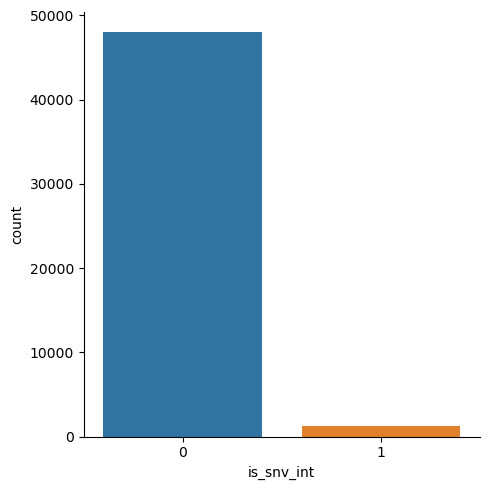

In [40]:
# class label imbalance in train
sns.catplot(x="is_snv_int", kind="count", data=df)
print(df['is_snv_int'].value_counts(normalize=True) * 100)

##### Feature correlations

In [41]:
le = LabelEncoder()
df_heatmap = pd.DataFrame(columns=feature_cols)
for feature in feature_cols:
    if df[feature].dtype == 'object':
        print(feature)
        le.fit(df[feature])
        df_heatmap[feature] = le.transform(df[feature])
    else:
        df_heatmap[feature] = df[feature]

REF
Chr


/opt/anaconda3/envs/cs4220p1/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


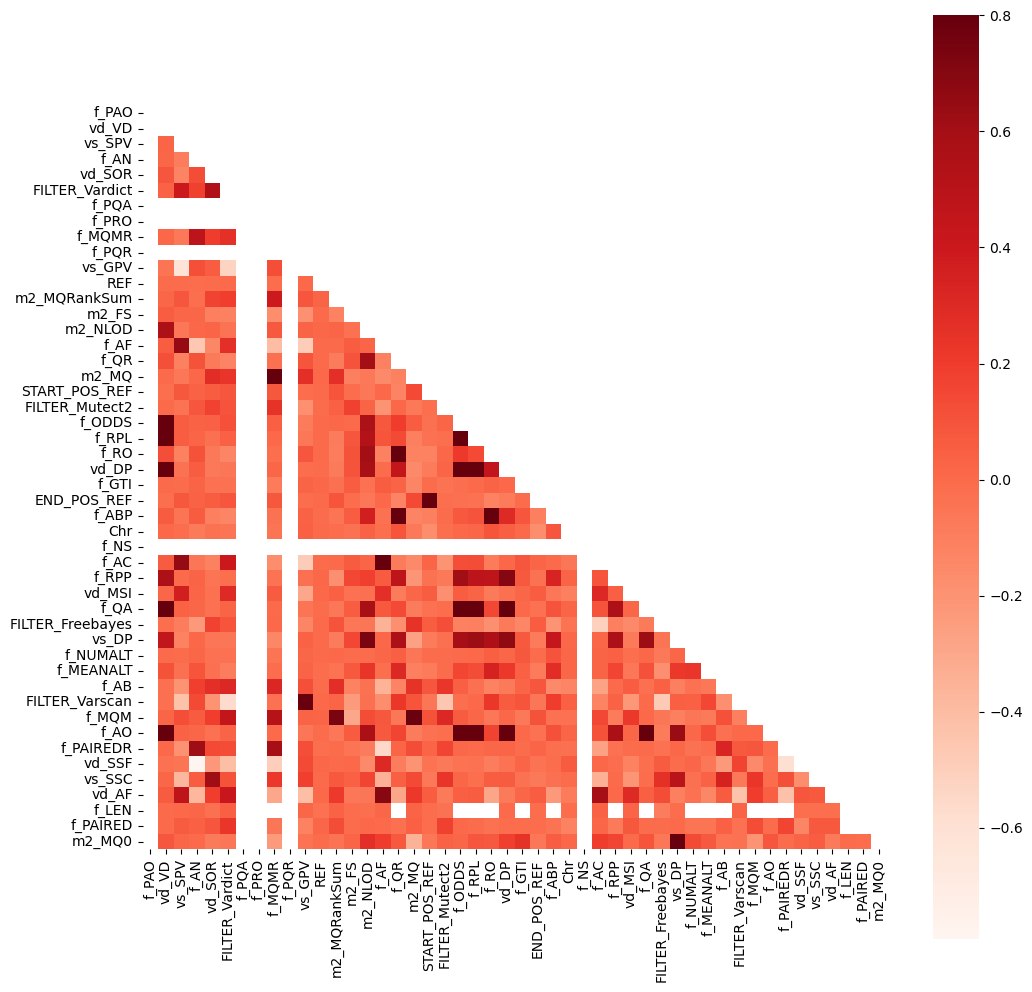

In [42]:
fig = plt.subplots(figsize=(12,12))
# df_heatmap = df.drop(['Chr'], inplace=True)
cor = df_heatmap.corr()
matrix = np.triu(cor)
sns.heatmap(cor, vmax=.8, square=True, cmap=plt.cm.Reds, annot=True, annot_kws={"fontsize":6}, mask=matrix)
plt.show()

##### START_POS_REF

In [43]:
print(df["START_POS_REF"].min())
print(df["START_POS_REF"].max())

3
249240478


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/409207852.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['START_POS_REF-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='START_POS_REF-bin', values=0).sort_index(ascending=False, axis=1)
/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/409207852.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['START_POS_REF-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='START_POS_REF-bin', values=0).sort_index(ascending=False, axis=1)


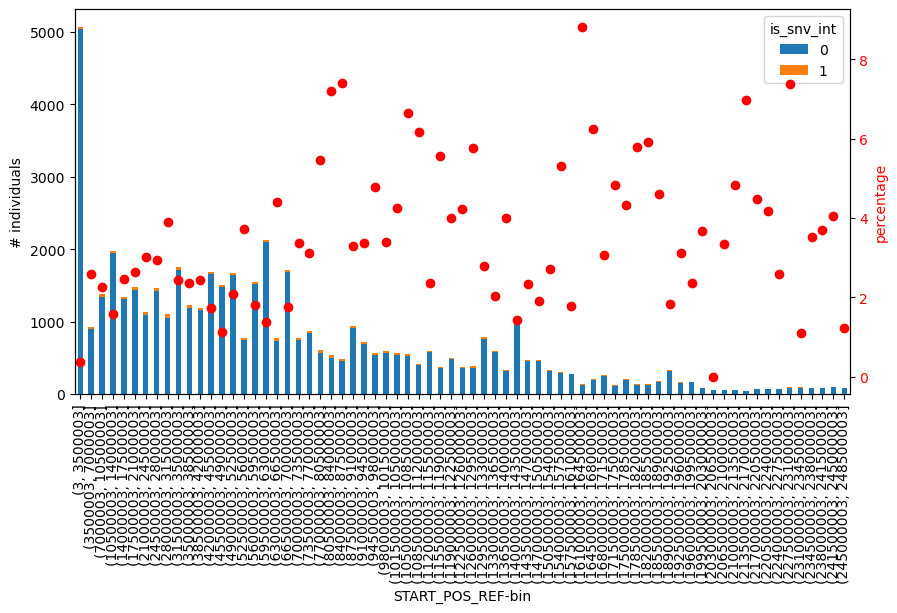

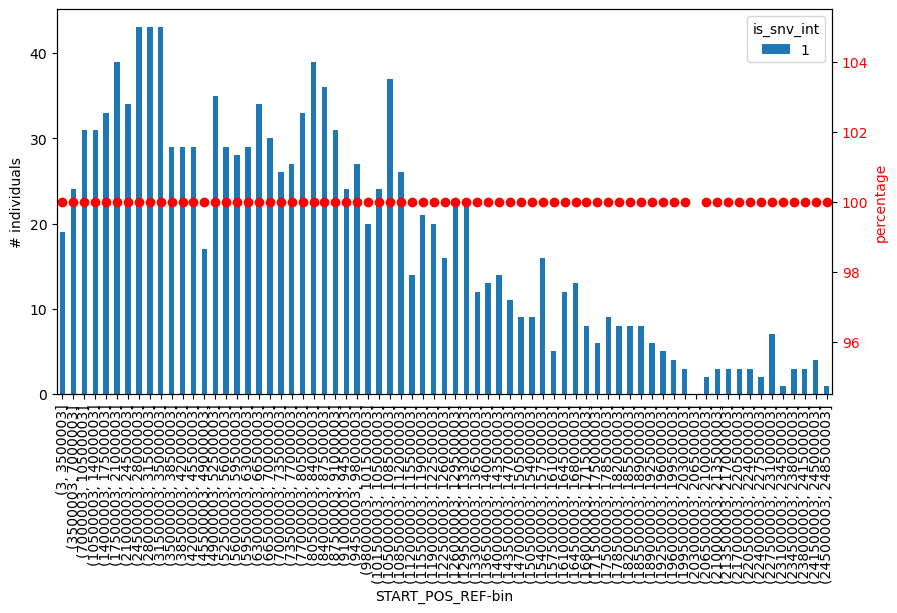

In [44]:
bins = np.arange(df["START_POS_REF"].min(), df["START_POS_REF"].max(), 3500000)
df["START_POS_REF-bin"] = pd.cut(df["START_POS_REF"], bins=bins, include_lowest=False)

df_plot = df.groupby(['START_POS_REF-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='START_POS_REF-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

########### Only 1's values ######
bins = np.arange(df["START_POS_REF"].min(), df["START_POS_REF"].max(), 3500000)
df["START_POS_REF-bin"] = pd.cut(df["START_POS_REF"], bins=bins, include_lowest=False)

df_plot = df.groupby(['START_POS_REF-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='START_POS_REF-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['START_POS_REF-bin'], axis=1, inplace=True)

##### Mutect2

m2_MQ

In [45]:
print(df["m2_MQ"].min())
print(df["m2_MQ"].max())

10.13
62.65


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3817907202.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['m2_MQ-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQ-bin', values=0).sort_index(ascending=False, axis=1)


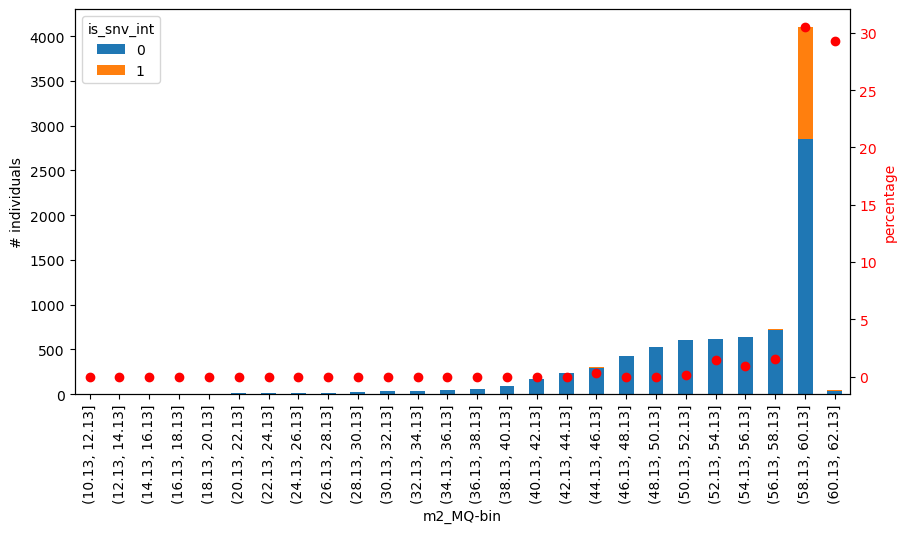

In [46]:
bins = np.arange(df["m2_MQ"].min(), df["m2_MQ"].max(), 2)
df["m2_MQ-bin"] = pd.cut(df["m2_MQ"], bins=bins, include_lowest=False)

df_plot = df.groupby(['m2_MQ-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQ-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['m2_MQ-bin'], axis=1, inplace=True)

m2_FS

/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/2386091602.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['m2_FS-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_FS-bin', values=0).sort_index(ascending=False, axis=1)


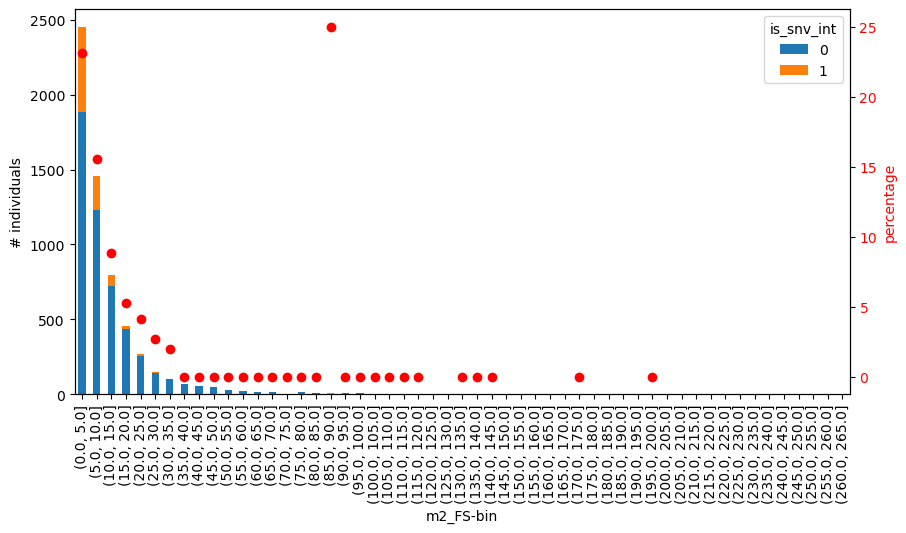

In [47]:
bins = np.arange(df["m2_FS"].min(), df["m2_FS"].max(), 5)
df["m2_FS-bin"] = pd.cut(df["m2_FS"], bins=bins, include_lowest=False)

df_plot = df.groupby(['m2_FS-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_FS-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['m2_FS-bin'], axis=1, inplace=True)

m2_MQ0

In [48]:
print(df["m2_MQ0"].min())
print(df["m2_MQ0"].max())

0.0
8213.0


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/4183636874.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['m2_MQ0-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQ0-bin', values=0).sort_index(ascending=False, axis=1)
/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/4183636874.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['m2_MQ0-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQ0-bin', values=0).sort_index(ascending=False, axis=1)


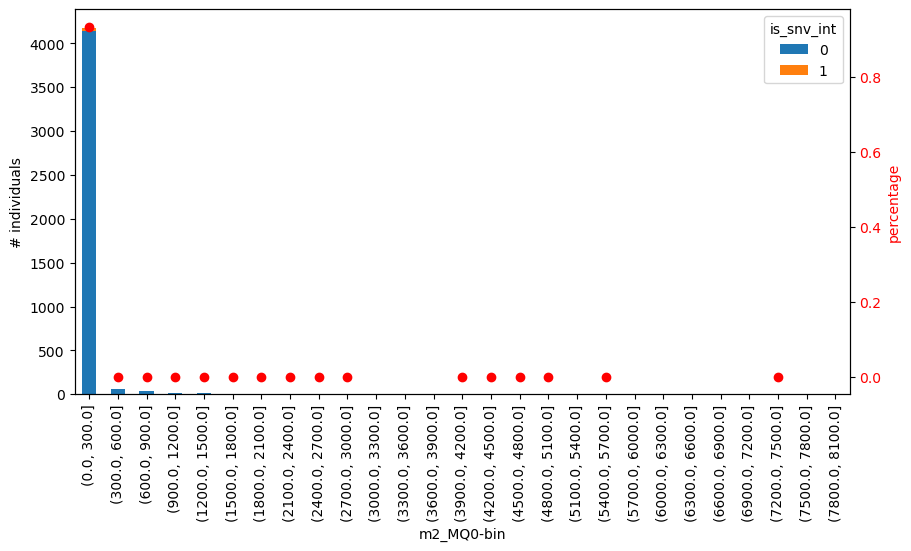

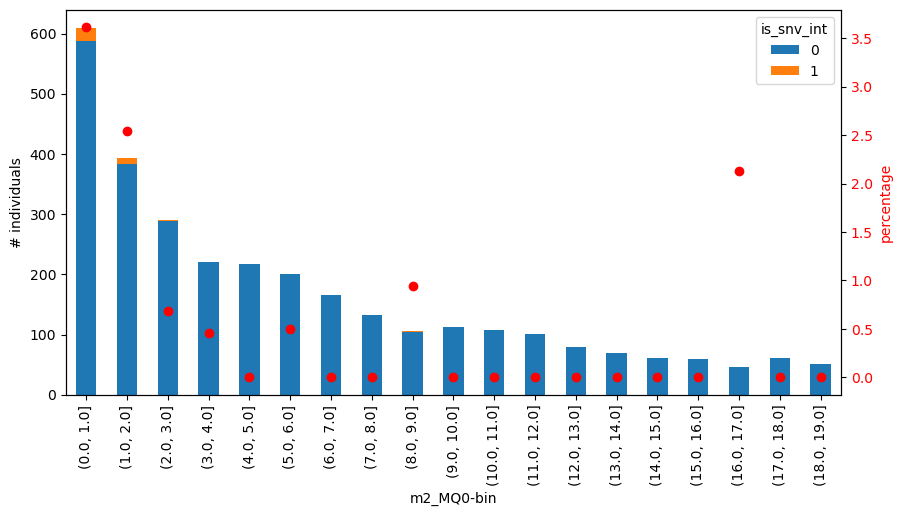

In [49]:
bins = np.arange(df["m2_MQ0"].min(), df["m2_MQ0"].max(), 300)
df["m2_MQ0-bin"] = pd.cut(df["m2_MQ0"], bins=bins, include_lowest=False)

df_plot = df.groupby(['m2_MQ0-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQ0-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0,1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

############## Zoom into smaller range ############
bins = np.arange(df["m2_MQ0"].min(), 20, 1)
df["m2_MQ0-bin"] = pd.cut(df["m2_MQ0"], bins=bins, include_lowest=False)

df_plot = df.groupby(['m2_MQ0-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQ0-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0,1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['m2_MQ0-bin'], axis=1, inplace=True)

m2_MQRankSum

In [50]:
print(df["m2_MQRankSum"].min())
print(df["m2_MQRankSum"].max())

-28.182
7.936


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/324342251.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['m2_MQRankSum-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQRankSum-bin', values=0).sort_index(ascending=False, axis=1)


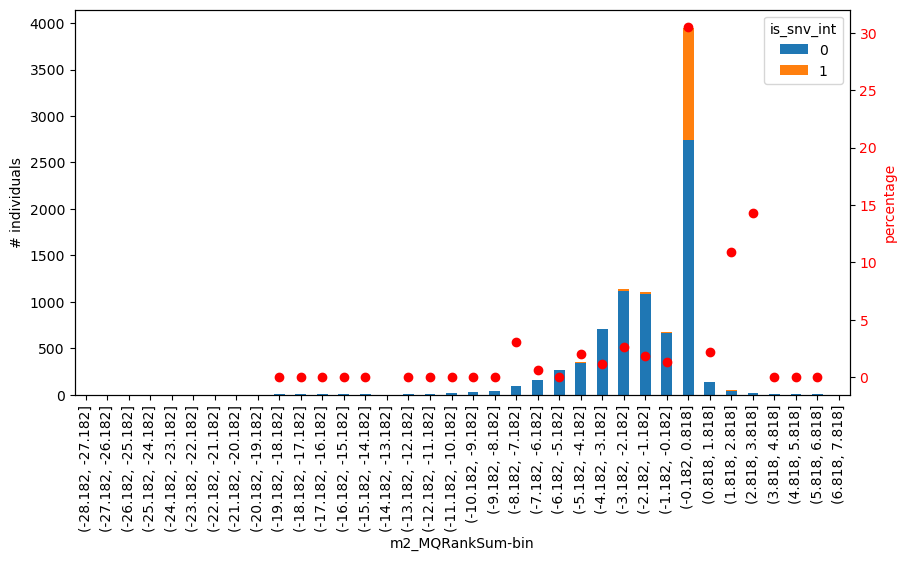

In [51]:
bins = np.arange(df["m2_MQRankSum"].min(), df["m2_MQRankSum"].max(), 1)
df["m2_MQRankSum-bin"] = pd.cut(df["m2_MQRankSum"], bins=bins, include_lowest=False)

df_plot = df.groupby(['m2_MQRankSum-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_MQRankSum-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0,1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['m2_MQRankSum-bin'], axis=1, inplace=True)

m2_NLOD

In [52]:
print(df["m2_NLOD"].min())
print(df["m2_NLOD"].max())

0.507
2283.25


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3538675892.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['m2_NLOD-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_NLOD-bin', values=0).sort_index(ascending=False, axis=1)
/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3538675892.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['m2_NLOD-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_NLOD-bin', values=0).sort_index(ascending=False, axis=1)


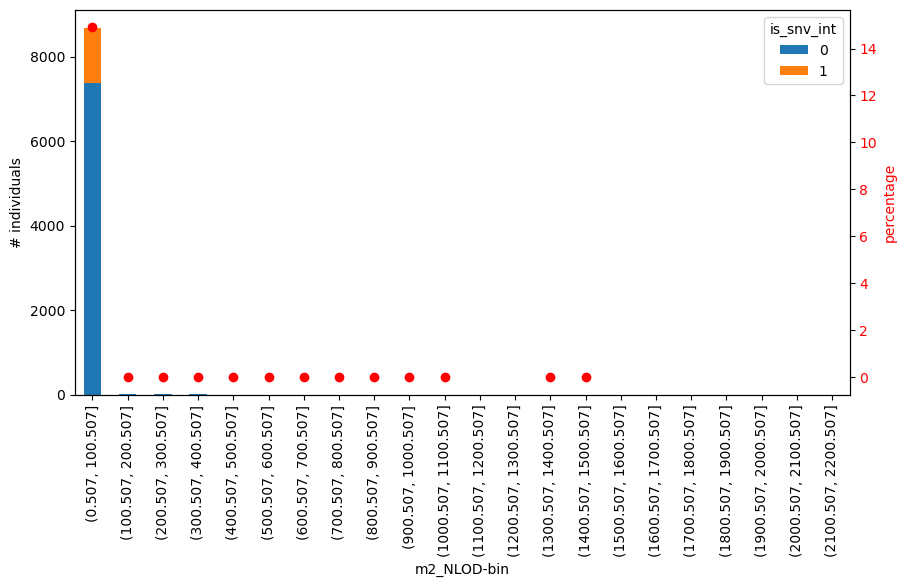

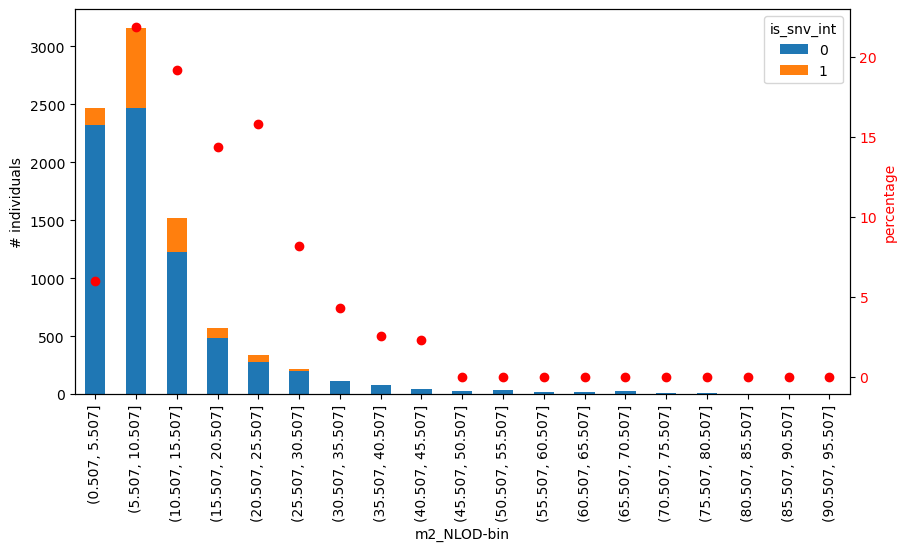

In [53]:
bins = np.arange(df["m2_NLOD"].min(), df["m2_NLOD"].max(), 100)
df["m2_NLOD-bin"] = pd.cut(df["m2_NLOD"], bins=bins, include_lowest=False)

df_plot = df.groupby(['m2_NLOD-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_NLOD-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0,1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

################### Zoom into smaller range ##############
bins = np.arange(df["m2_NLOD"].min(), 100, 5)
df["m2_NLOD-bin"] = pd.cut(df["m2_NLOD"], bins=bins, include_lowest=False)

df_plot = df.groupby(['m2_NLOD-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='m2_NLOD-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0,1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['m2_NLOD-bin'], axis=1, inplace=True)

##### FreeBayes

f_MQMR

In [54]:
df["f_MQMR"].min()

0.0

In [55]:
df["f_MQMR"].max()

70.0

/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/1968242763.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['f_MQMR-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='f_MQMR-bin', values=0).sort_index(ascending=False, axis=1)


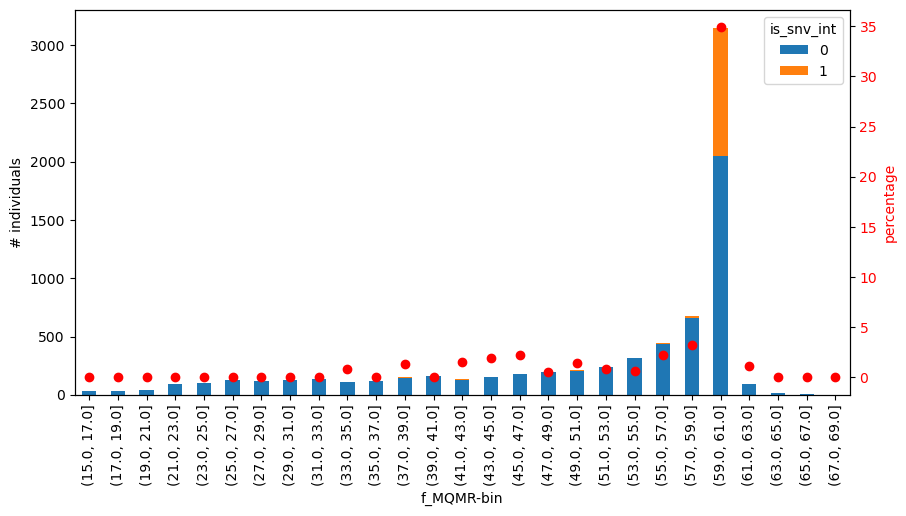

In [56]:
bins = np.arange(15, df["f_MQMR"].max(), 2)
df["f_MQMR-bin"] = pd.cut(df["f_MQMR"], bins=bins, include_lowest=False)

df_plot = df.groupby(['f_MQMR-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='f_MQMR-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['f_MQMR-bin'], axis=1, inplace=True)


f_MQM

/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3280298838.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby(['f_MQM-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='f_MQM-bin', values=0).sort_index(ascending=False, axis=1)


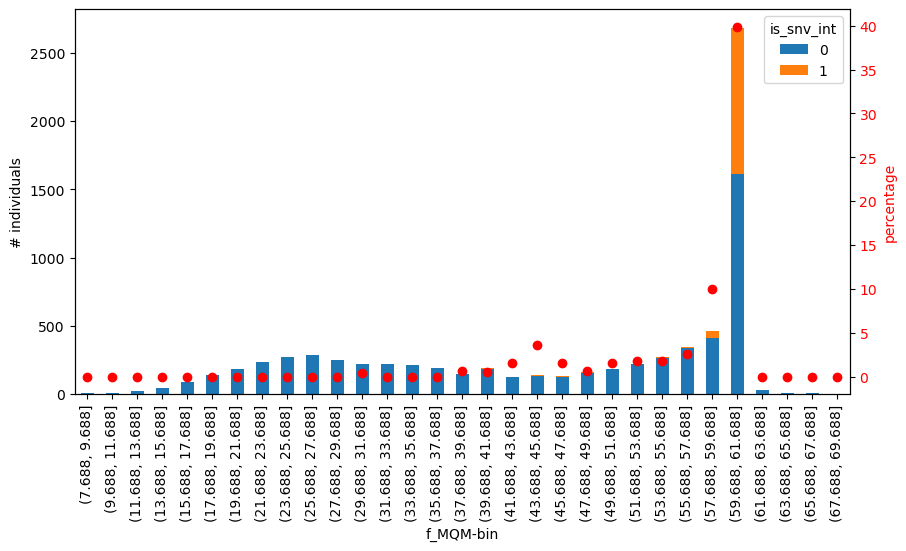

In [57]:
bins = np.arange( df["f_MQM"].min(), df["f_MQM"].max(), 2)
df["f_MQM-bin"] = pd.cut(df["f_MQM"], bins=bins, include_lowest=False)

df_plot = df.groupby(['f_MQM-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index='f_MQM-bin', values=0).sort_index(ascending=False, axis=1)
df_plot = df_plot[[0, 1]]

fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(kind='bar', stacked=True, ax=ax)
ax.set_ylabel('# individuals')

df_plot = df_plot.fillna(0)
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

ax2 = ax.twinx()
ax2.plot(df_plot[1].values, 'o', c='r')
ax2.set_ylabel('percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

df.drop(['f_MQM-bin'], axis=1, inplace=True)


f_MQMR


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_AF


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_QR
f_ODDS


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)
/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_RPL
f_RO


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)
/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_GTI


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_ABP


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_RPP


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_AC


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_QA


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_NUMALT


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_MEANALT


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_AB


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_MQM


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_AO
f_PAIREDR


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)
/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_LEN


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_PAIRED


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


f_AN


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/92213093.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


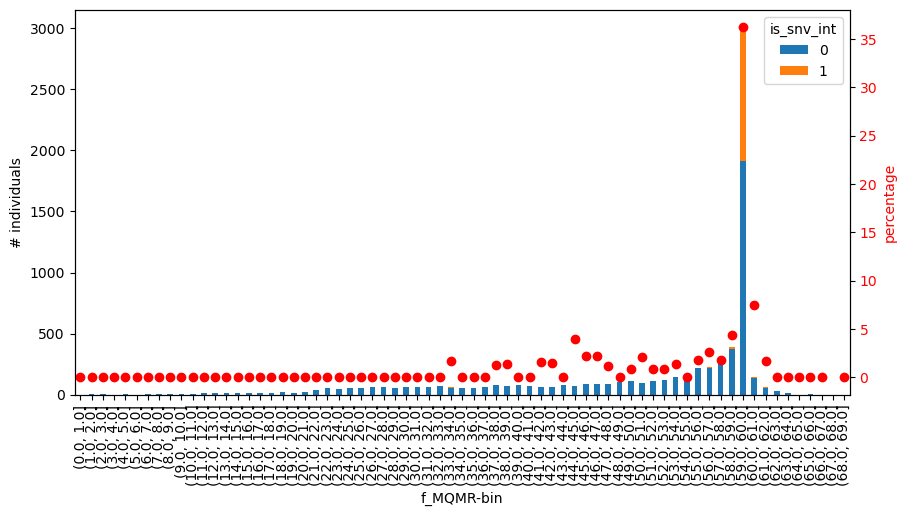

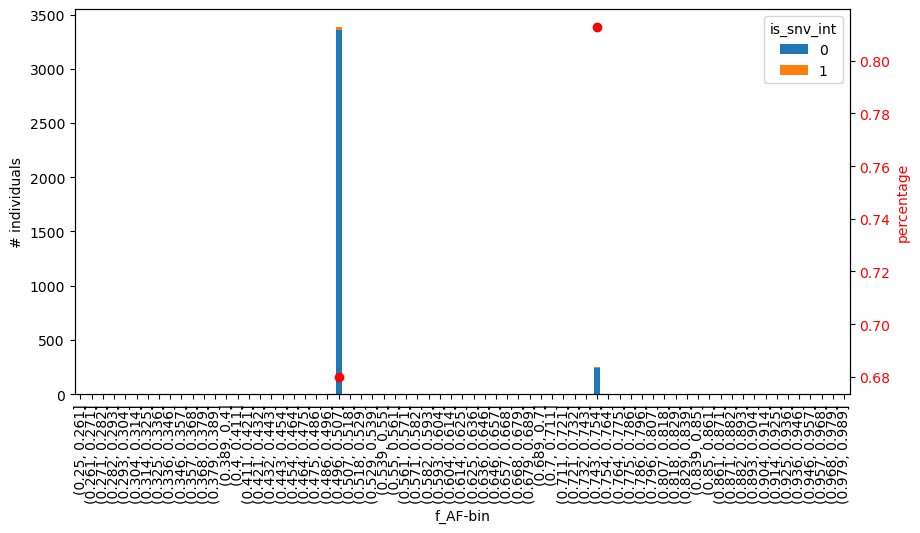

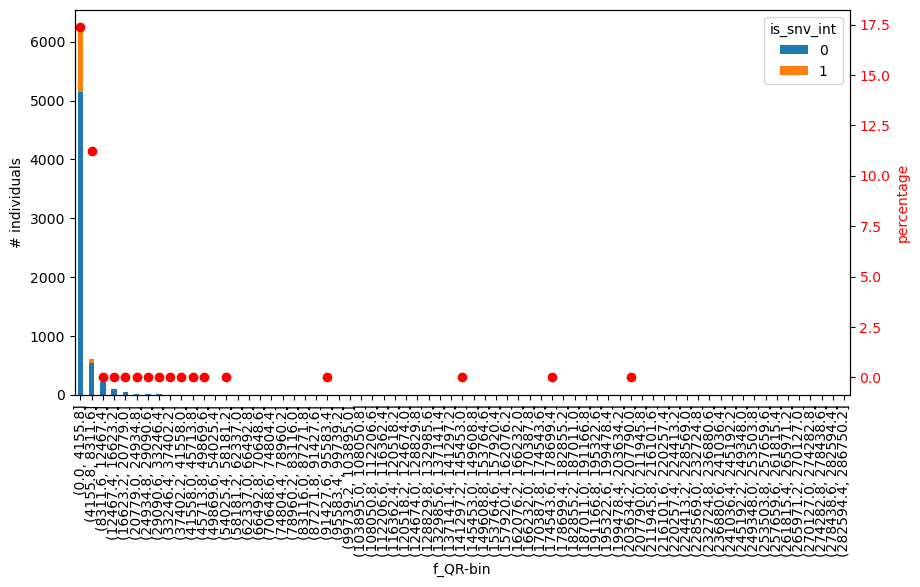

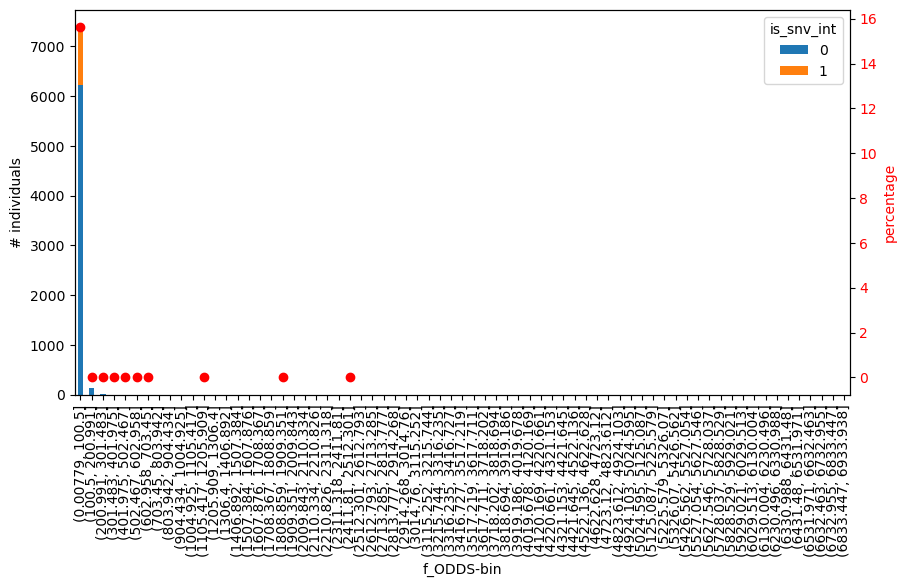

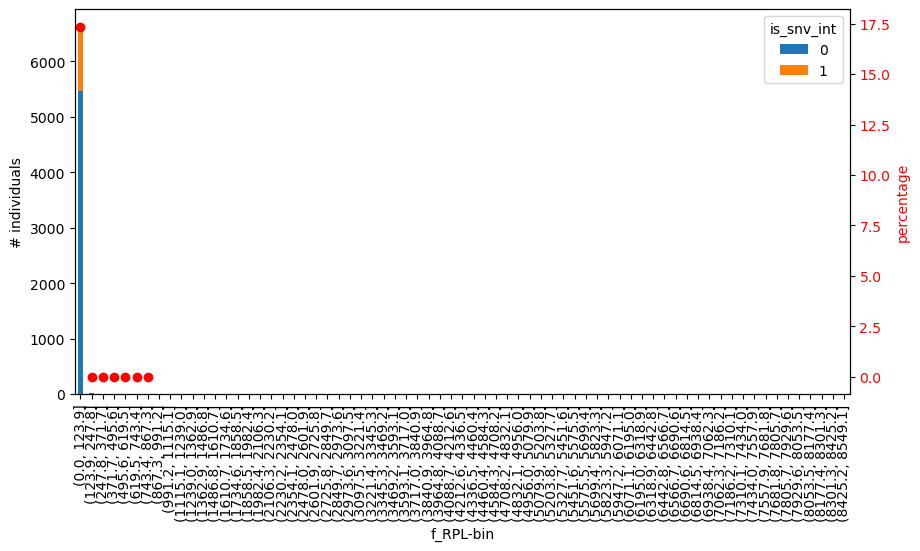

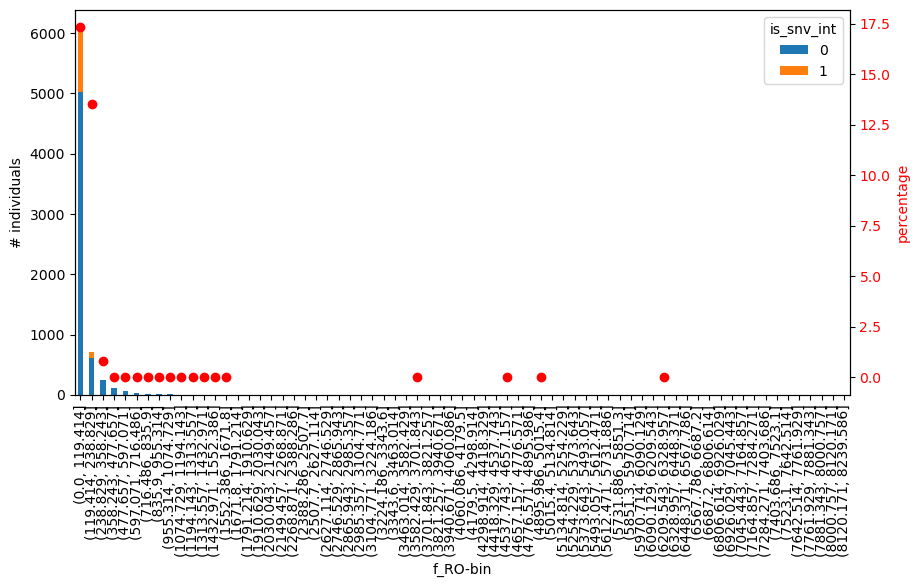

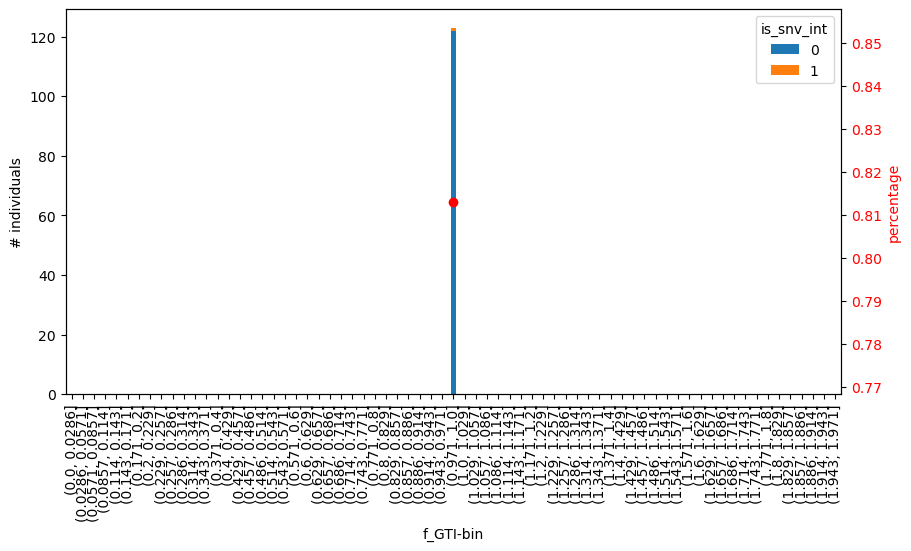

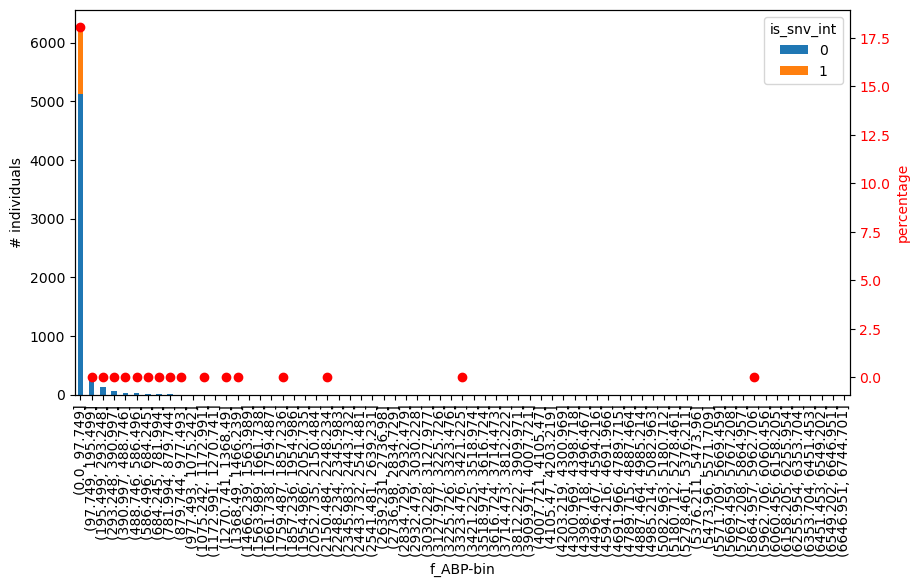

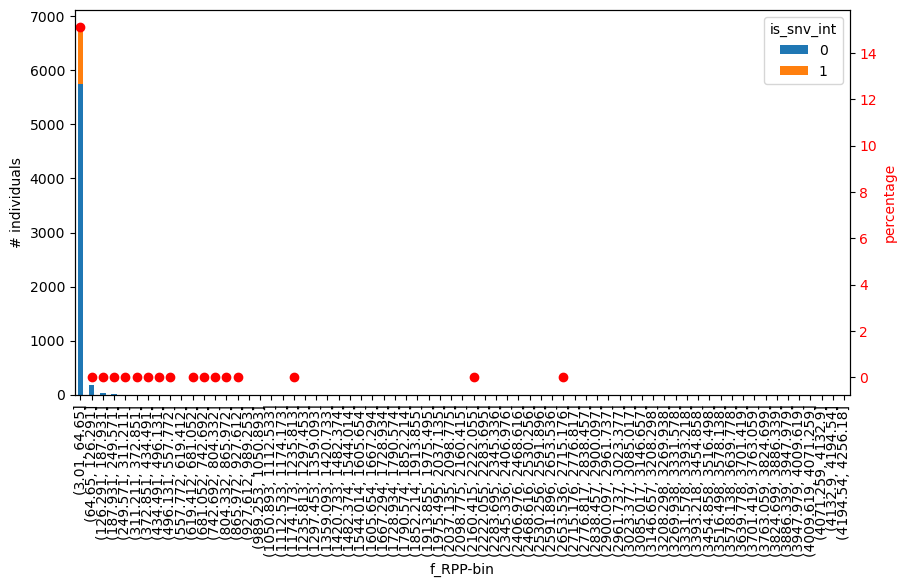

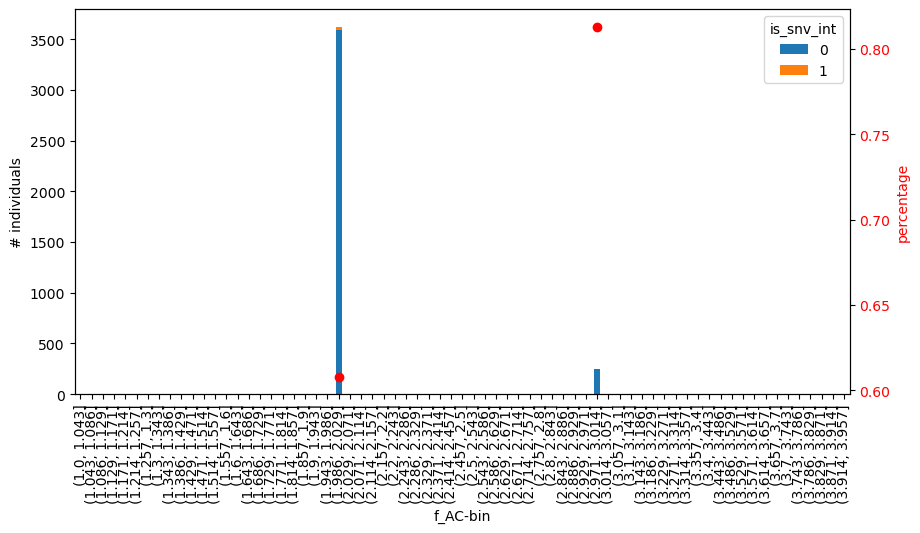

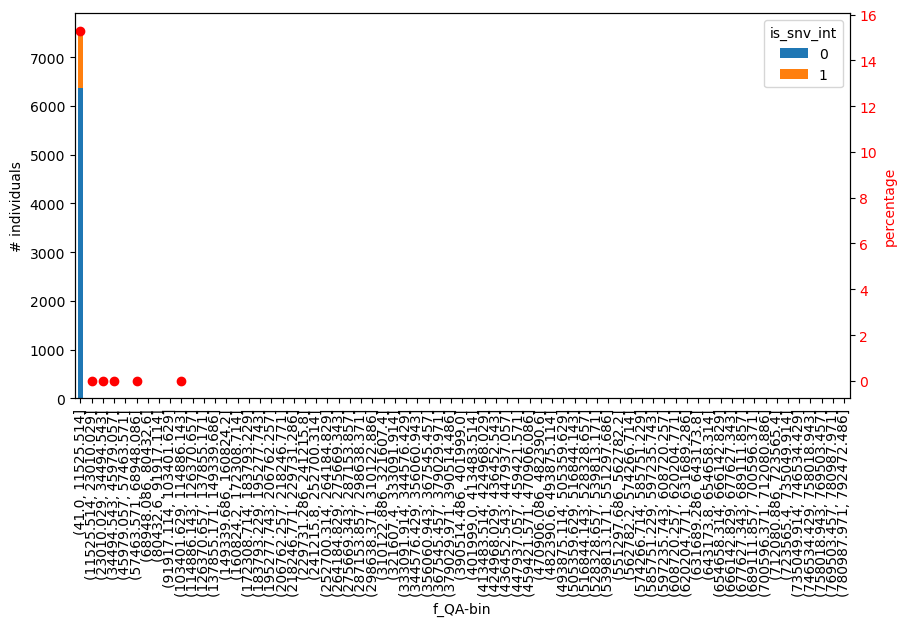

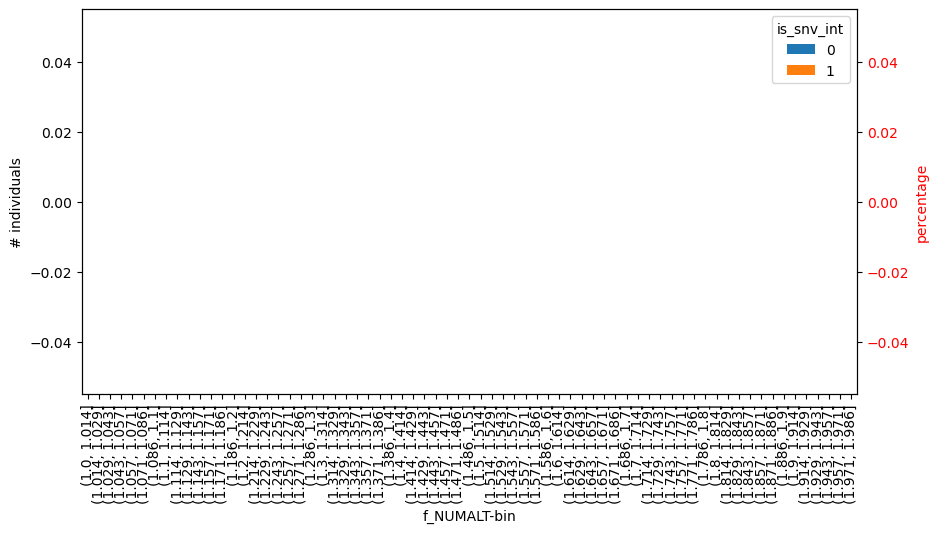

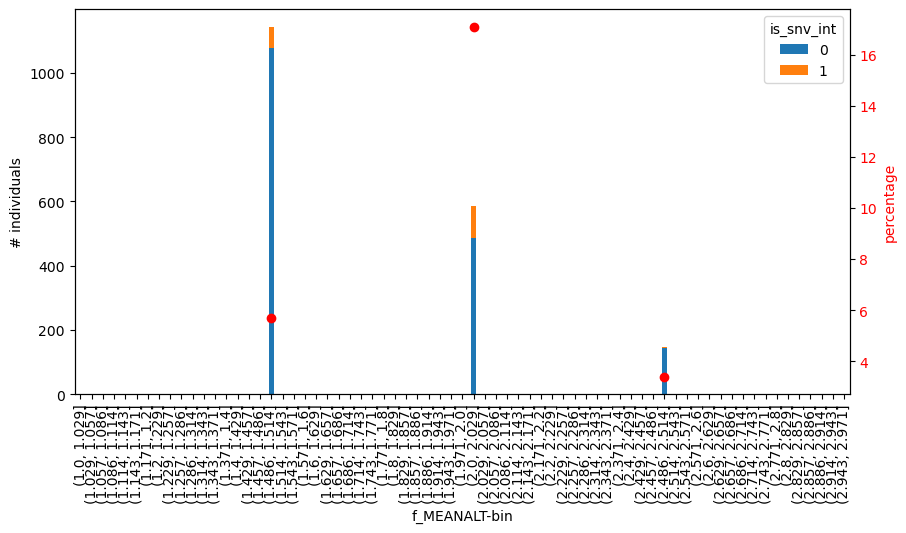

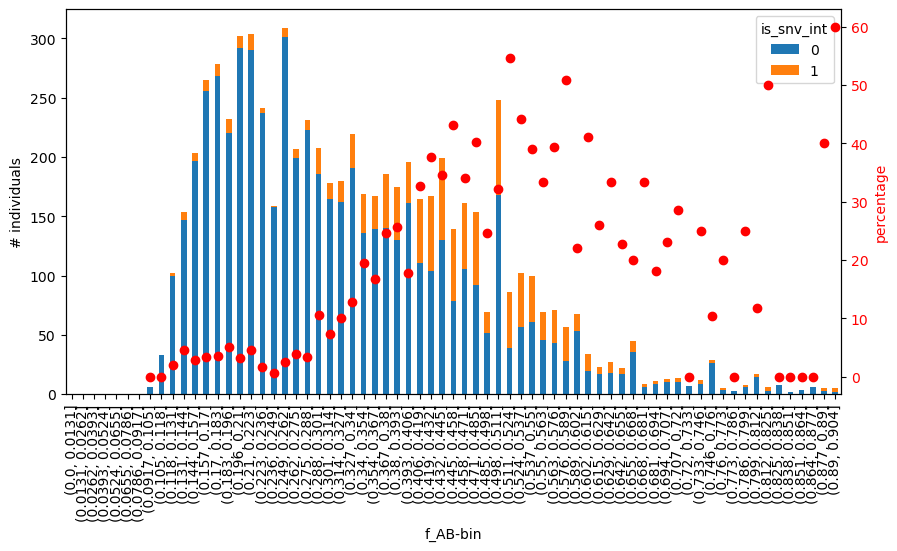

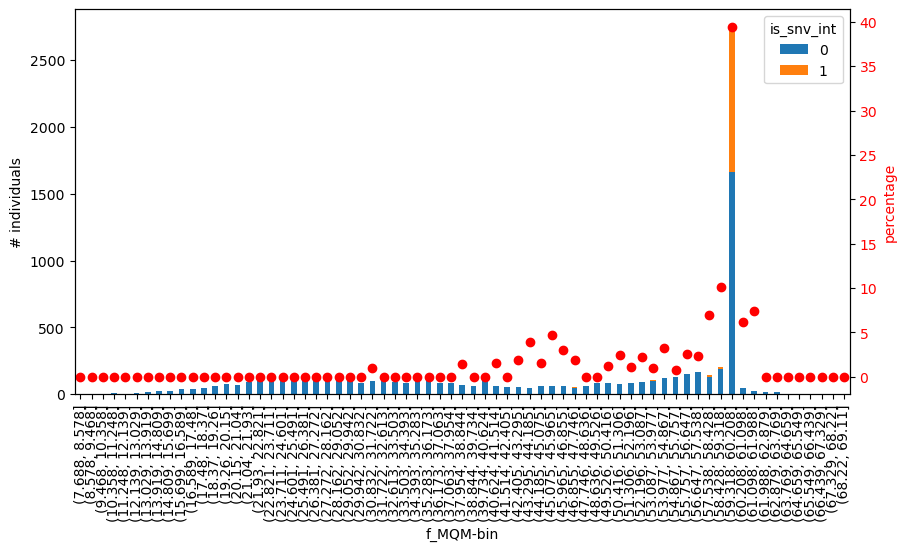

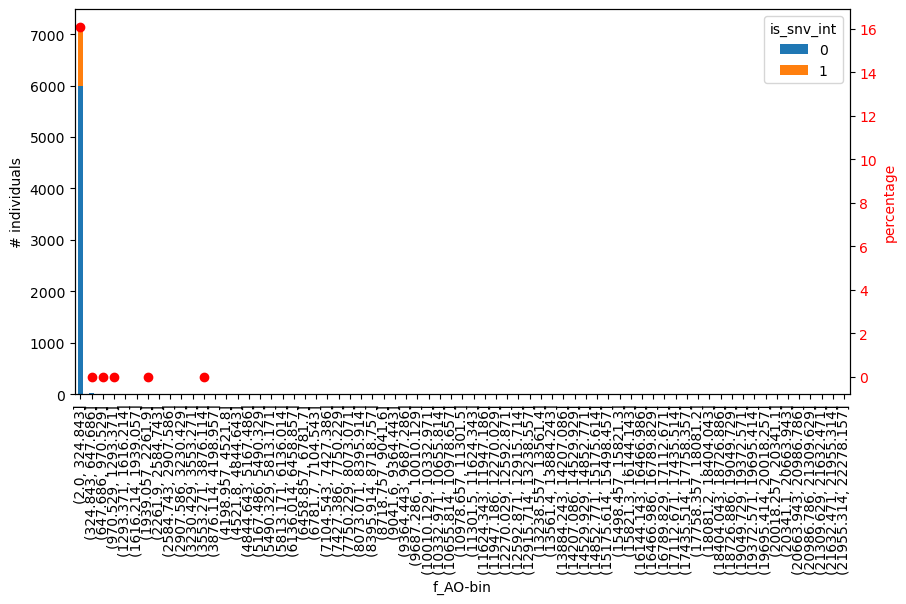

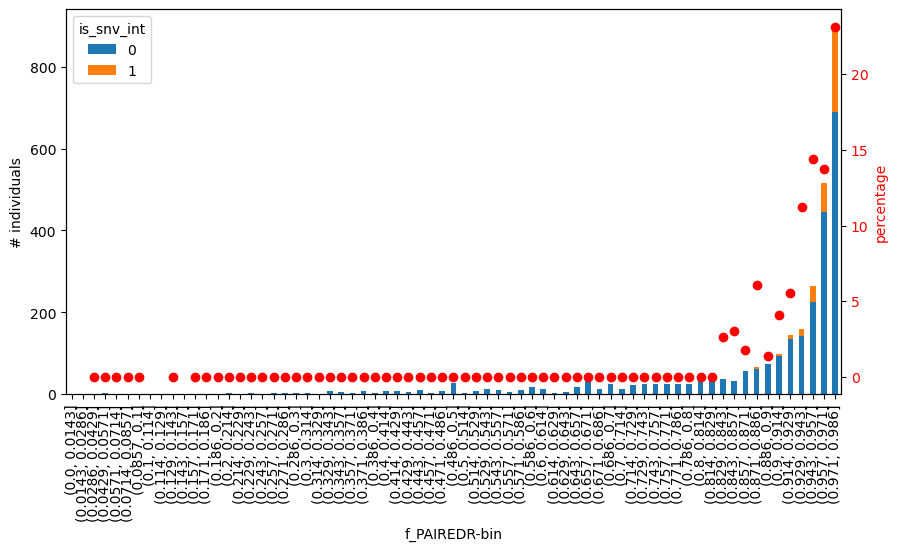

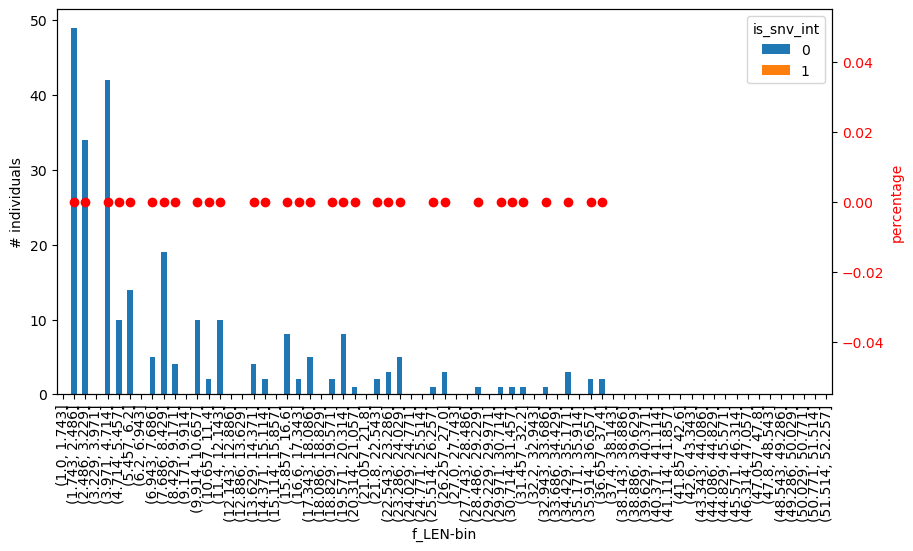

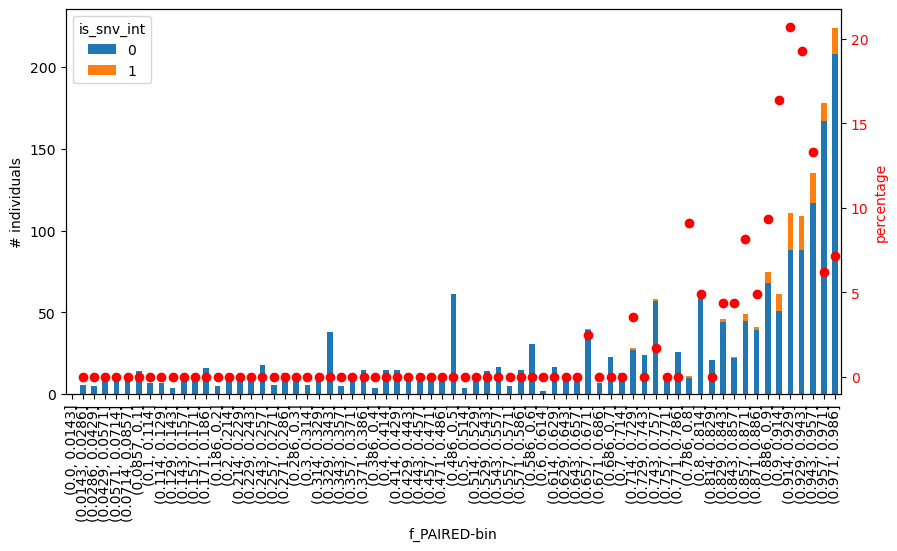

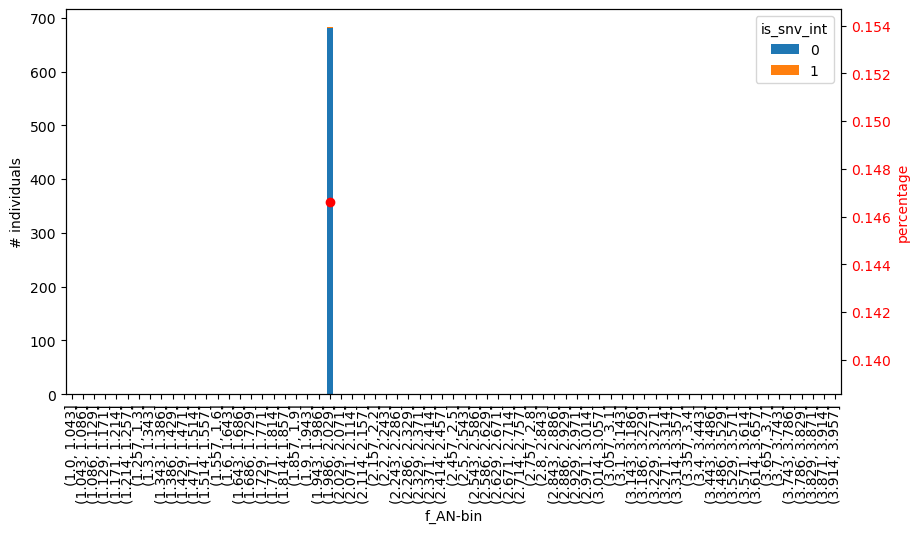

In [74]:

for f_feature in feature_cols:
       if not f_feature.startswith('f_'):
              continue
       print(f_feature)
       bins = np.arange( df[f_feature].min(), df[f_feature].max(), (df[f_feature].max() - df[f_feature].min())/70.0)
       df[f"{f_feature}-bin"] = pd.cut(df[f_feature], bins=bins, include_lowest=False)

       df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)
       df_plot = df_plot[[0, 1]]

       fig, ax = plt.subplots(figsize=(10,5))
       df_plot.plot(kind='bar', stacked=True, ax=ax)
       ax.set_ylabel('# individuals')

       df_plot = df_plot.fillna(0)
       df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

       ax2 = ax.twinx()
       ax2.plot(df_plot[1].values, 'o', c='r')
       ax2.set_ylabel('percentage', color='r')
       ax2.tick_params(axis='y', labelcolor='r')

       df.drop([f'{f_feature}-bin'], axis=1, inplace=True)

##### Varscan

vs_SPV


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3759537088.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


vs_GPV


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3759537088.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


vs_DP
vs_SSC


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3759537088.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)
/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/3759537088.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


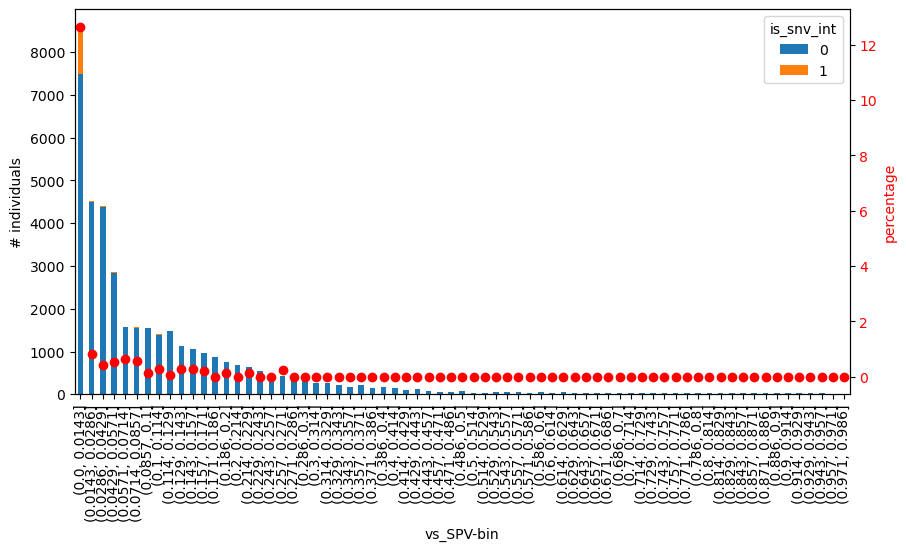

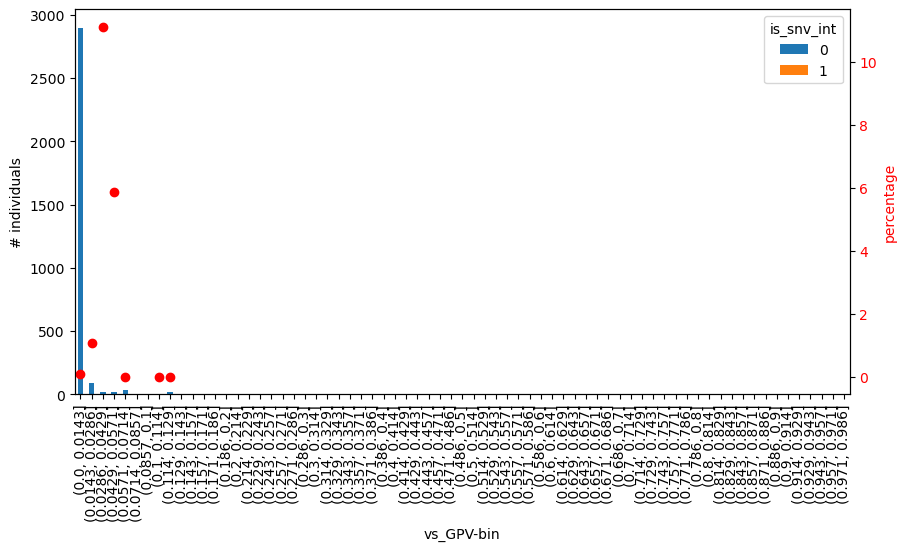

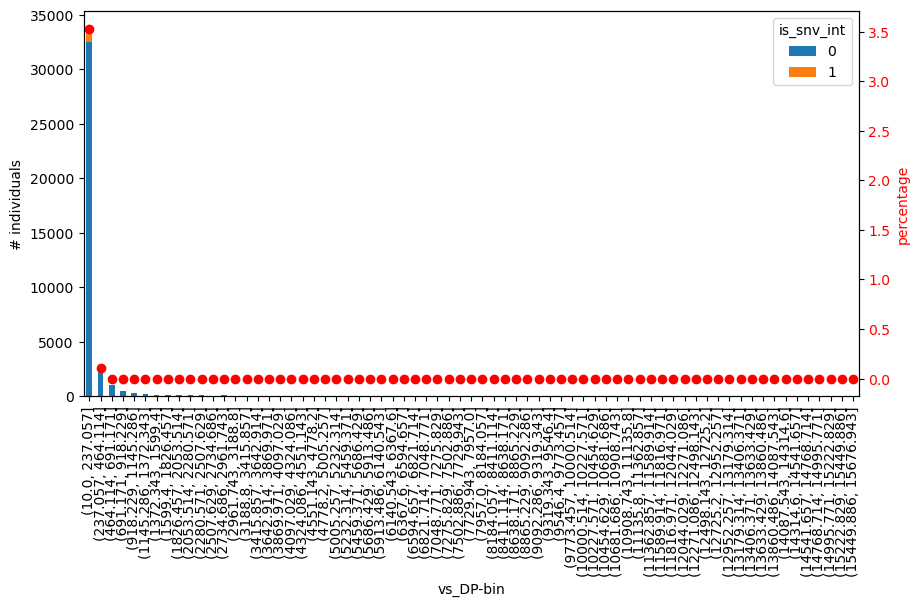

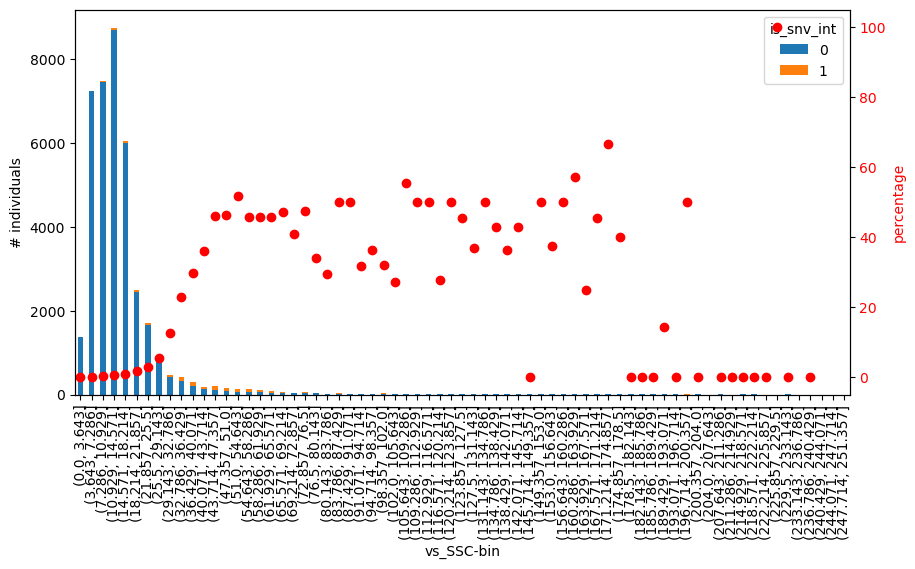

In [75]:
for f_feature in feature_cols:
       if not f_feature.startswith('vs_'):
              continue
       print(f_feature)
       bins = np.arange( df[f_feature].min(), df[f_feature].max(), (df[f_feature].max() - df[f_feature].min())/70.0)
       df[f"{f_feature}-bin"] = pd.cut(df[f_feature], bins=bins, include_lowest=False)

       df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)
       df_plot = df_plot[[0, 1]]

       fig, ax = plt.subplots(figsize=(10,5))
       df_plot.plot(kind='bar', stacked=True, ax=ax)
       ax.set_ylabel('# individuals')

       df_plot = df_plot.fillna(0)
       df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

       ax2 = ax.twinx()
       ax2.plot(df_plot[1].values, 'o', c='r')
       ax2.set_ylabel('percentage', color='r')
       ax2.tick_params(axis='y', labelcolor='r')

       df.drop([f'{f_feature}-bin'], axis=1, inplace=True)

##### Vardict

vd_VD


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/1016334508.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


vd_SOR


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/1016334508.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


vd_DP


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/1016334508.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


vd_MSI


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/1016334508.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


vd_SSF


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/1016334508.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


vd_AF


/var/folders/_0/ztgrcgnj1bd__vhjt7plwd2w0000gn/T/ipykernel_34243/1016334508.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)


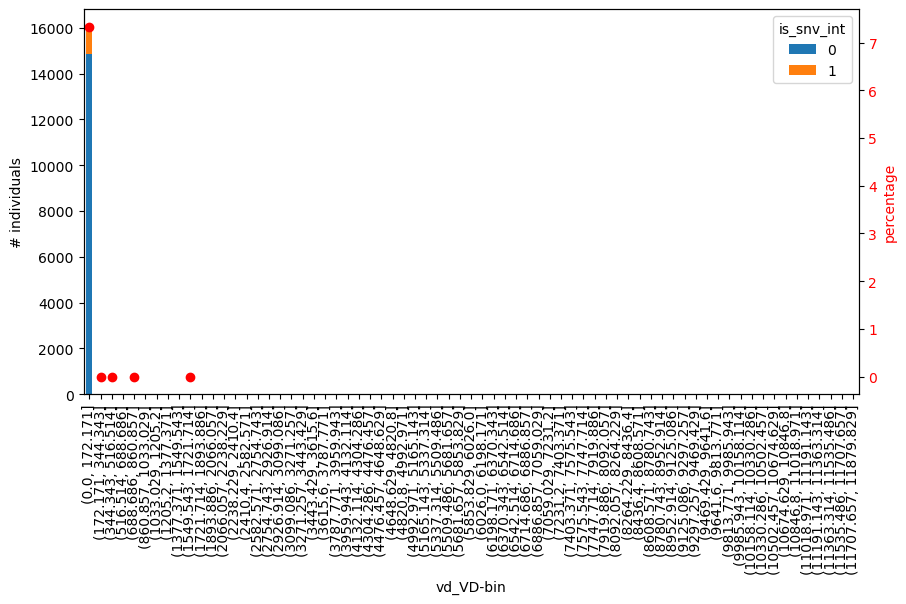

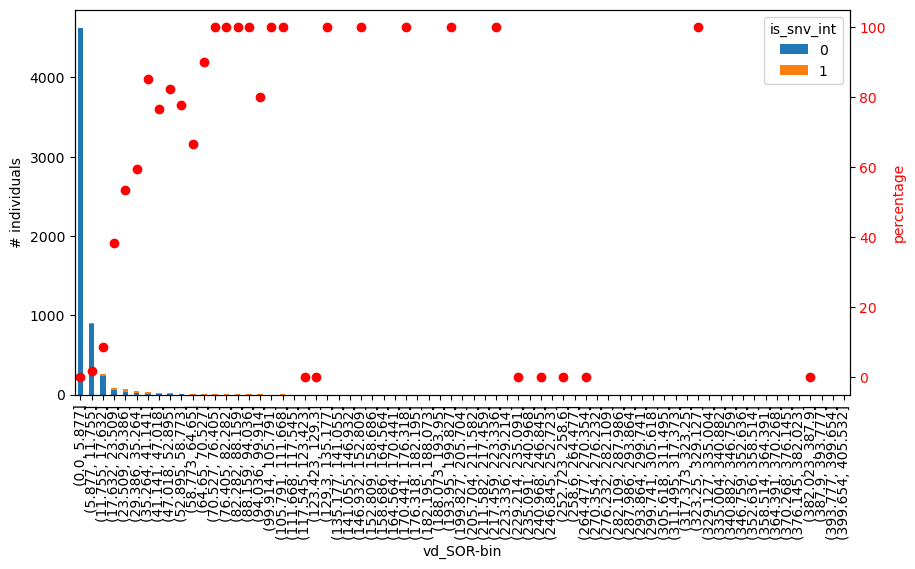

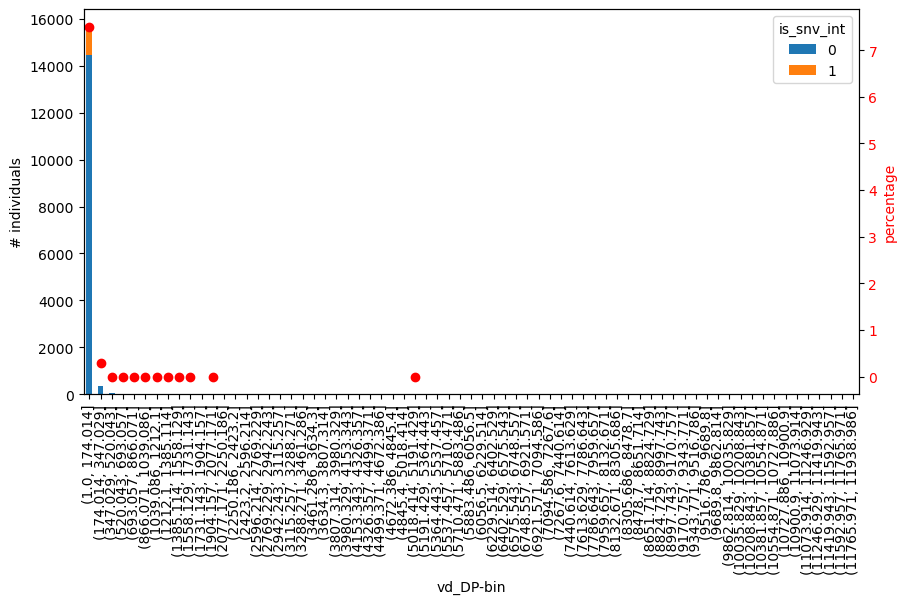

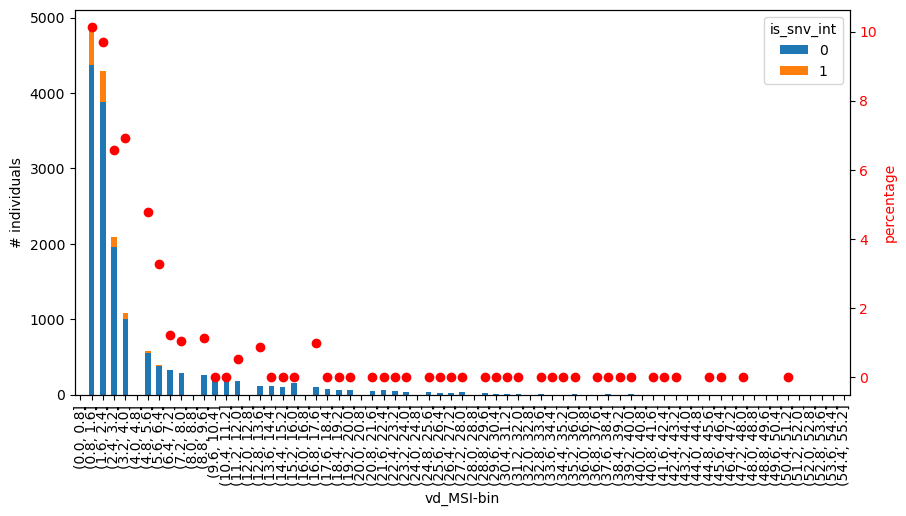

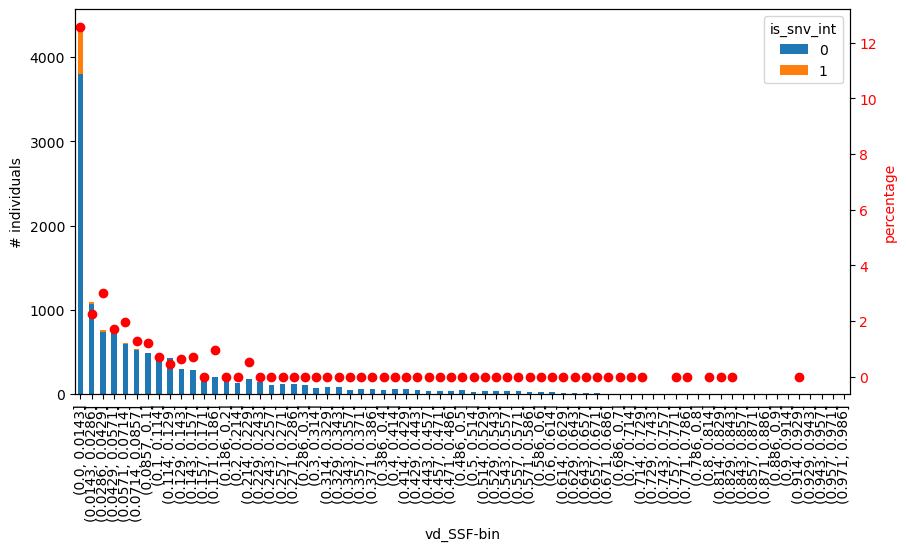

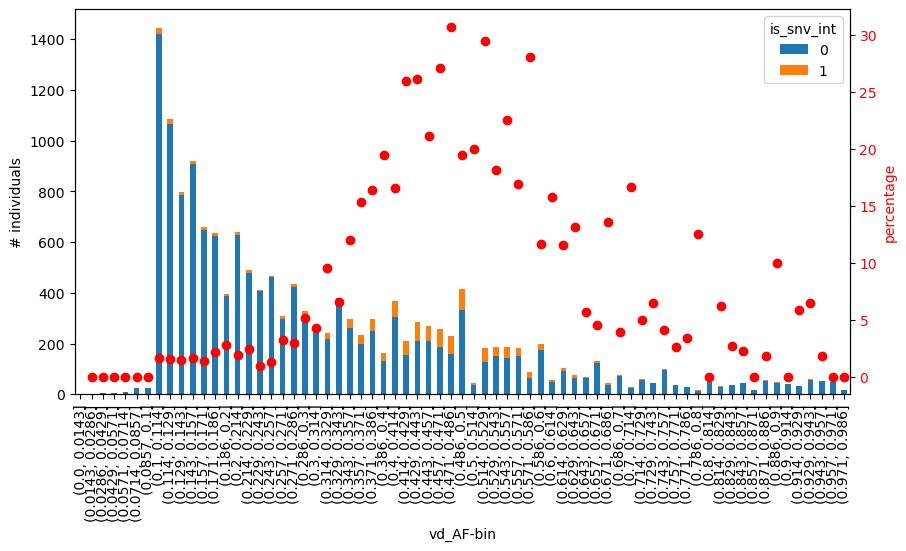

In [81]:
for f_feature in feature_cols:
       if not f_feature.startswith('vd_'):
              continue
       print(f_feature)
       bins = np.arange( df[f_feature].min(), df[f_feature].max(), (df[f_feature].max() - df[f_feature].min())/70.0)
       df[f"{f_feature}-bin"] = pd.cut(df[f_feature], bins=bins, include_lowest=False)

       df_plot = df.groupby([f'{f_feature}-bin', 'is_snv_int']).size().reset_index().pivot(columns='is_snv_int', index=f'{f_feature}-bin', values=0).sort_index(ascending=False, axis=1)
       df_plot = df_plot[[0, 1]]

       fig, ax = plt.subplots(figsize=(10,5))
       df_plot.plot(kind='bar', stacked=True, ax=ax)
       ax.set_ylabel('# individuals')

       df_plot = df_plot.fillna(0)
       df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)*100

       ax2 = ax.twinx()
       ax2.plot(df_plot[1].values, 'o', c='r')
       ax2.set_ylabel('percentage', color='r')
       ax2.tick_params(axis='y', labelcolor='r')

       df.drop([f'{f_feature}-bin'], axis=1, inplace=True)

### Train and Test set distribution